In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


Load Data


In [12]:
data = pd.read_csv('expenses.csv')

Explore the Dataset

In [13]:
print(data.head())


  month  income  food  transportation  entertainment  utilities  shopping  \
0   Jan   45000  7000            2500           2000       3500      4000   
1   Feb   46000  7200            2600           1800       3600      4200   
2   Mar   44000  6900            2400           2100       3400      4100   
3   Apr   47000  7100            2550           2200       3700      4300   
4   May   48000  7300            2700           2000       3800      4500   

   savings  
0     5000  
1     5200  
2     4900  
3     5300  
4     5500  


In [14]:
print(data.describe())


             income         food  transportation  entertainment    utilities  \
count     12.000000    12.000000       12.000000      12.000000    12.000000   
mean   50083.333333  7516.666667     2870.833333    2366.666667  4008.333333   
std     4055.486370   419.595765      331.976405     365.148372   405.548637   
min    44000.000000  6900.000000     2400.000000    1800.000000  3400.000000   
25%    46750.000000  7175.000000     2587.500000    2075.000000  3675.000000   
50%    50500.000000  7550.000000     2850.000000    2350.000000  4050.000000   
75%    53250.000000  7825.000000     3125.000000    2625.000000  4325.000000   
max    56000.000000  8200.000000     3400.000000    3000.000000  4600.000000   

          shopping      savings  
count    12.000000    12.000000  
mean   4675.000000  5750.000000  
std     447.467622   571.282449  
min    4000.000000  4900.000000  
25%    4275.000000  5275.000000  
50%    4750.000000  5800.000000  
75%    5025.000000  6225.000000  
max    

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   month           12 non-null     object
 1   income          12 non-null     int64 
 2   food            12 non-null     int64 
 3   transportation  12 non-null     int64 
 4   entertainment   12 non-null     int64 
 5   utilities       12 non-null     int64 
 6   shopping        12 non-null     int64 
 7   savings         12 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 900.0+ bytes
None


In [16]:

print(data.isnull().sum())


month             0
income            0
food              0
transportation    0
entertainment     0
utilities         0
shopping          0
savings           0
dtype: int64


In [17]:
print(data.shape)

(12, 8)


Split the dataset into features and target variable


In [18]:
X = data[['income', 'food', 'transportation', 'entertainment', 'utilities', 'shopping']]
y = data['savings']

Split the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Linear Regression


In [22]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred1 = model1.predict(X_test)

In [25]:
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("R²:", r2_score(y_test, y_pred1))

MAE: 64.46711282025656
R²: 0.9883193060987623


Clustering for financial pattern analysis


In [27]:
model2 = KMeans(n_clusters = 3, random_state = 42)
clusters = model2.fit_predict(X)
data['Cluster'] = clusters


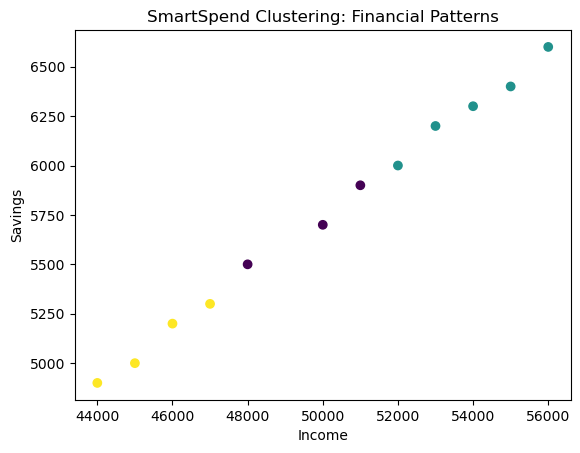

In [29]:
plt.scatter(data['income'], data['savings'], c = data['Cluster'])
plt.xlabel('Income')
plt.ylabel('Savings')
plt.title('SmartSpend Clustering: Financial Patterns')
plt.show()